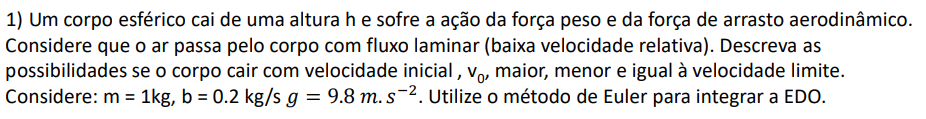

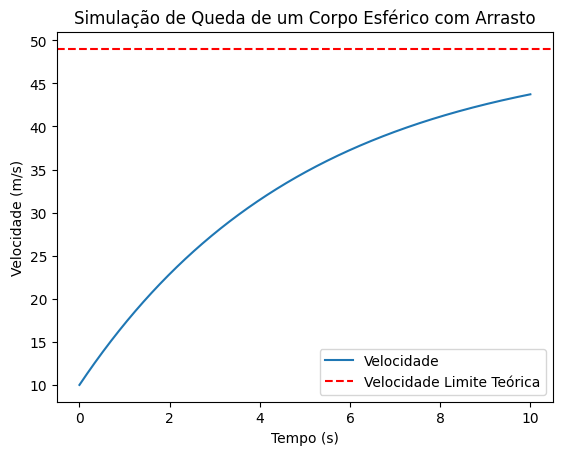

In [2]:
import matplotlib.pyplot as plt

# Parâmetros
massa = 1.0  # massa (kg)
coeficienteArrasto = 0.2  # coeficiente de arrasto (kg/s)
gravidade = 9.8  # aceleração devido à gravidade (m/s^2)
v0 = 10.0  # velocidade inicial (m/s)
passoTempo = 0.01  # intervalo de tempo (s)
numPassos = 1000  # número de passos



def simularQuedaCorpo(v0, passoTempo, massa, coeficienteArrasto, gravidade, numPassos):
    # Inicialização
    velocidades = [v0]
    tempos = [0]

    # Aplicação do método de Euler
    for _ in range(numPassos):
        velocidadeAtual = velocidades[-1]
        tempoAtual = tempos[-1]

        # Equação diferencial
        aceleracaoGravidade = gravidade
        forcaArrasto = coeficienteArrasto / massa * velocidadeAtual
        aceleracaoArrasto = -forcaArrasto / massa
        aceleracaoTotal = aceleracaoGravidade + aceleracaoArrasto

        # Atualização das variáveis
        novaVelocidade = velocidadeAtual + passoTempo * aceleracaoTotal
        novoTempo = tempoAtual + passoTempo

        # Adiciona os novos valores às listas
        velocidades.append(novaVelocidade)
        tempos.append(novoTempo)

    return tempos, velocidades

# Calcula a velocidade usando o método de Euler
tempos, velocidades = simularQuedaCorpo(v0, passoTempo, massa, coeficienteArrasto, gravidade, numPassos)

# Calcula a velocidade limite teórica
velocidadeLimite = (massa * gravidade) / coeficienteArrasto

# Plota os resultados
plt.plot(tempos, velocidades, label='Velocidade')
plt.axhline(y=velocidadeLimite, color='r', linestyle='--', label='Velocidade Limite Teórica')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.legend()
plt.title('Simulação de Queda de um Corpo Esférico com Arrasto')
plt.show()


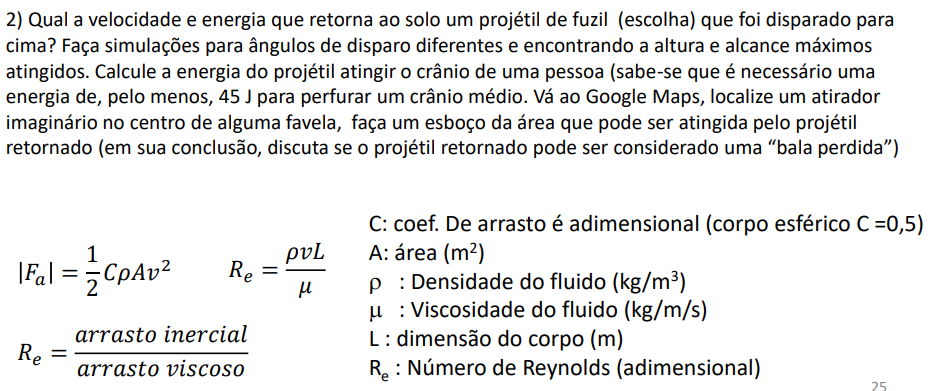

Ângulo de Lançamento: 45 graus
Altura Máxima: 12286.63 metros
Alcance Máximo: 49146.53 metros
Energia Total: 3395.53 joules
Pode Perfurar: para caralho

-----------

Ângulo de Lançamento: 60 graus
Altura Máxima: 18429.95 metros
Alcance Máximo: 42562.14 metros
Energia Total: 3961.46 joules
Pode Perfurar: para caralho

-----------

Ângulo de Lançamento: 75 graus
Altura Máxima: 22927.17 metros
Alcance Máximo: 24573.27 metros
Energia Total: 4375.74 joules
Pode Perfurar: para caralho

-----------



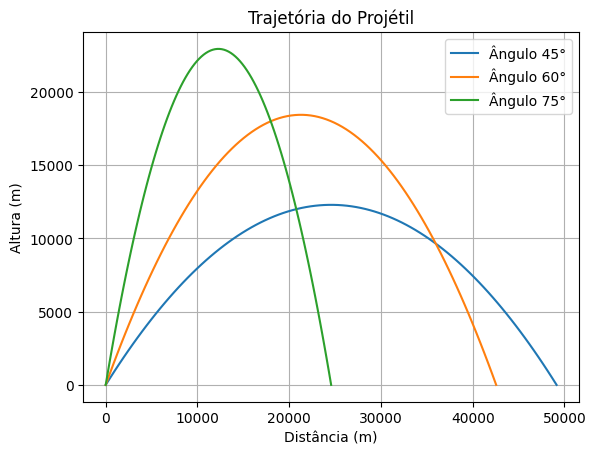

In [26]:
import math
import matplotlib.pyplot as plt
import numpy as np

def calcular_parametros(velocidade_inicial, angulo_lancamento, gravidade):
    angulo_lancamento_rad = math.radians(angulo_lancamento)
    altura_maxima = (velocidade_inicial**2 * math.sin(angulo_lancamento_rad)**2) / (2 * gravidade)
    alcance_maximo = (velocidade_inicial**2 * math.sin(2 * angulo_lancamento_rad)) / gravidade
    return altura_maxima, alcance_maximo

def calcular_energia(massa, velocidade, altura):
    energia_cinetica = 0.5 * massa * velocidade**2
    energia_total = energia_cinetica + massa * 9.8 * altura
    return energia_total

def calcular_trajetoria(velocidade_inicial, angulo_lancamento, gravidade, num_pontos=100):
    angulo_lancamento_rad = np.radians(angulo_lancamento)
    tempo_total = (2 * velocidade_inicial * np.sin(angulo_lancamento_rad)) / gravidade
    tempo = np.linspace(0, tempo_total, num_pontos)
    distancia = velocidade_inicial * np.cos(angulo_lancamento_rad) * tempo
    altura = velocidade_inicial * np.sin(angulo_lancamento_rad) * tempo - 0.5 * gravidade * tempo**2
    return distancia, altura

# Parâmetros comuns
velocidade_inicial = 694  # velocidade inicial (m/s)
gravidade = 9.8  # aceleração devida à gravidade (m/s^2)
massa_projétil = 0.0094  # massa do projétil (kg)
energia_minima_perfuracao = 45

angulos_lancamento = [45, 60, 75]

for angulo in angulos_lancamento:
    # Cálculos
    altura_maxima, alcance_maximo = calcular_parametros(velocidade_inicial, angulo, gravidade)
    energia_total = calcular_energia(massa_projétil, velocidade_inicial, altura_maxima)
    pode_perfurar = energia_total >= energia_minima_perfuracao

    if pode_perfurar:
        pode_perfurar_texto = "para caralho"
    else:
        pode_perfurar_texto = "ta suave"
        
    # Exibindo resultados
    print(f"Ângulo de Lançamento: {angulo} graus")
    print(f"Altura Máxima: {altura_maxima:.2f} metros")
    print(f"Alcance Máximo: {alcance_maximo:.2f} metros")
    print(f"Energia Total: {energia_total:.2f} joules")
    print(f"Pode Perfurar: {pode_perfurar_texto}")
    print("")
    print("-----------")
    print("")
    # Plotando a trajetória
    distancia, altura = calcular_trajetoria(velocidade_inicial, angulo, gravidade)
    plt.plot(distancia, altura, label=f'Ângulo {angulo}°')

# Ajustando o gráfico
plt.title('Trajetória do Projétil')

plt.xlabel('Distância (m)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.legend()
plt.show()
